In [151]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [152]:
img = cv2.imread("images/solidYellowLeft.jpg")
height = 640
width = 800
dim = (800,640)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)

In [153]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image Dimensions :: (640, 800, 3)


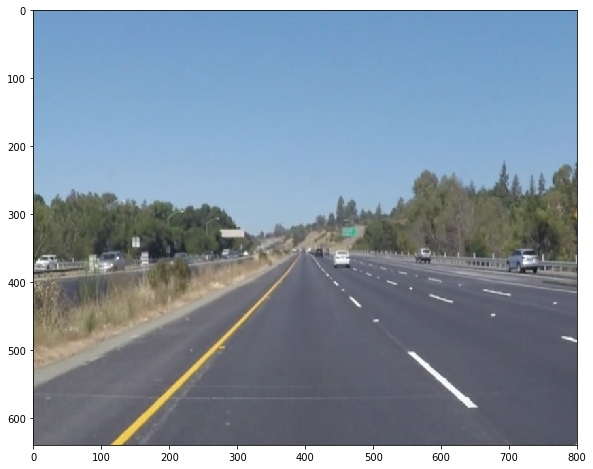

In [154]:
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(img.shape))
plt.imshow(img)

In [155]:
# CONVERTS 3 CHANNEL IMAGE TO SINGLE CHANNEL
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

Image Dimensions :: (640, 800)


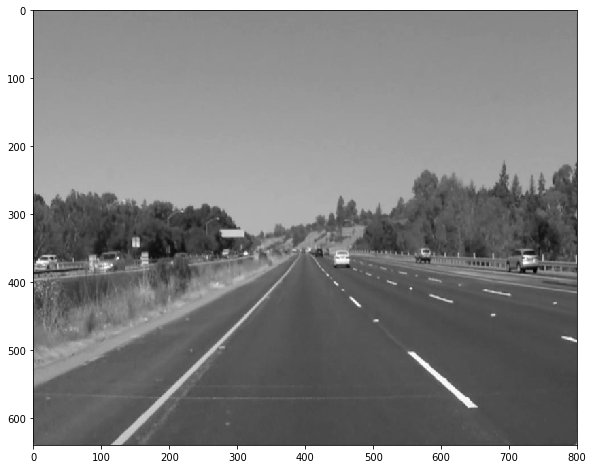

In [156]:
gray_img = get_gray(img)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gray_img.shape))
plt.imshow(gray_img, cmap='gray')

In [157]:
# show canny image
def canny_img(img, low_threshold, high_treshold):
    return cv2.Canny(img, low_threshold, high_treshold)

Image Dimensions :: (640, 800)


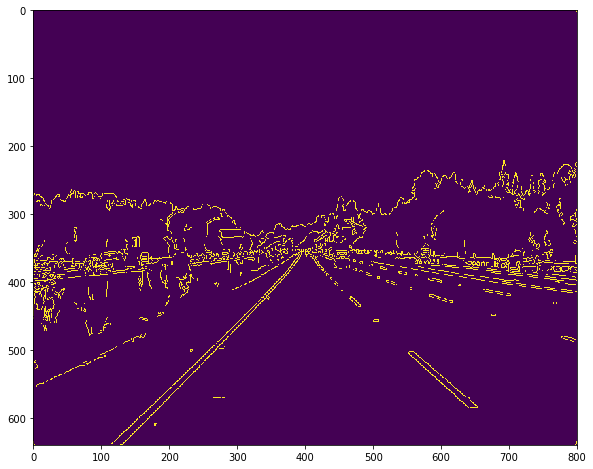

In [158]:
c_img = canny_img(gray_img, 50,150)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c_img.shape))
plt.imshow(c_img)

In [159]:
def gaussian_blur(img, kernelsize):
    return cv2.GaussianBlur(img, (kernelsize, kernelsize),0)

Image Dimensions :: (640, 800)


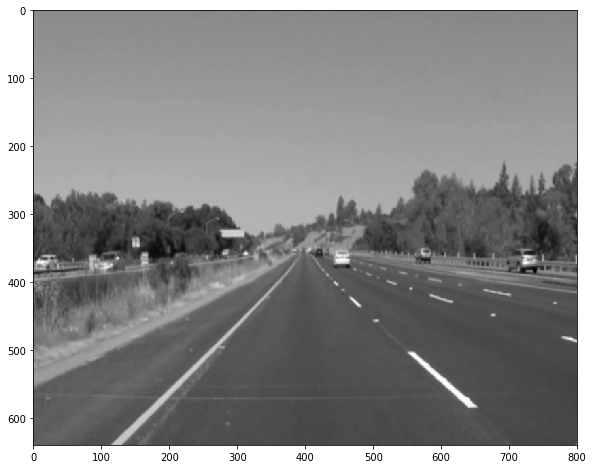

In [160]:
gsblur = gaussian_blur(gray_img, 3)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gsblur.shape))
plt.imshow(gsblur, cmap='gray')

Image Dimensions :: (640, 800)


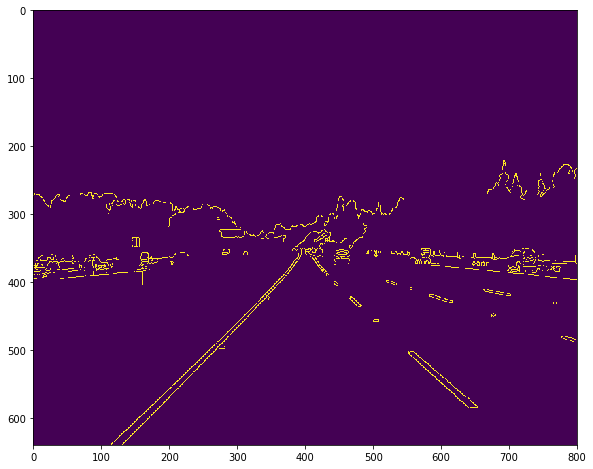

In [161]:
c2_img = canny_img(gsblur, 50,250)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c2_img.shape))
plt.imshow(c2_img)

Image Dimensions :: (640, 800, 3)


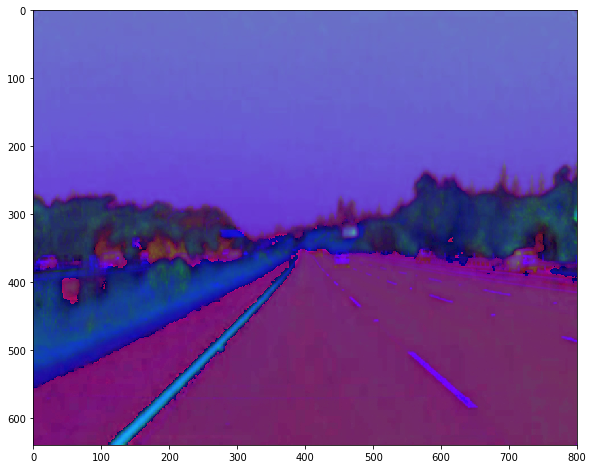

In [162]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(img_hsv.shape))
plt.imshow(img_hsv)

In [163]:
lower_yellow = np.array([20, 100, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

In [164]:
msk_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

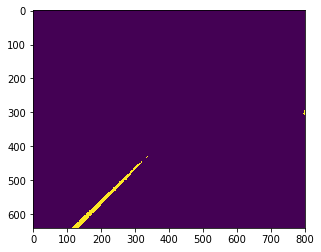

In [165]:
plt.imshow(msk_yellow)

In [166]:
msk_white = cv2.inRange(gray_img, 200, 255)

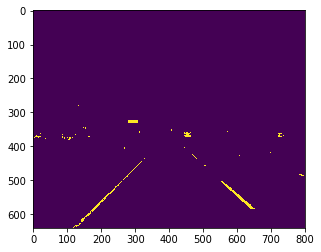

In [167]:
plt.imshow(msk_white)

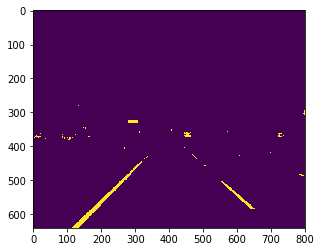

In [168]:
mask_yw = cv2.bitwise_or(msk_white, msk_yellow)
plt.imshow(mask_yw)

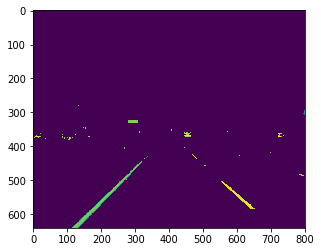

In [169]:
mask_yw_image = cv2.bitwise_and(gray_img, mask_yw)
plt.imshow(mask_yw_image)

Image Dimensions :: (640, 800)


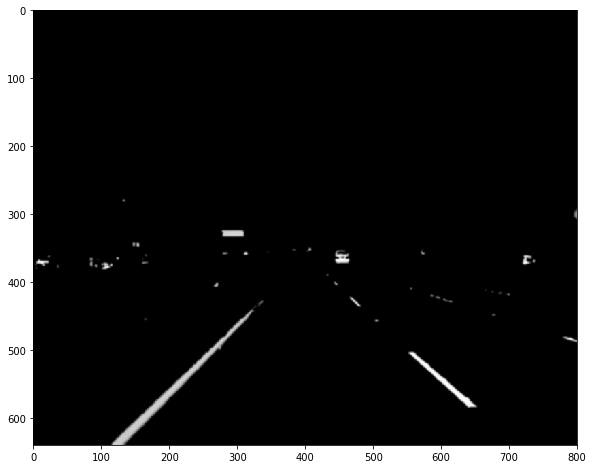

In [170]:
gsblur2 = gaussian_blur(mask_yw_image, 5)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gsblur2.shape))
plt.imshow(gsblur2, cmap='gray')

Image Dimensions :: (640, 800)


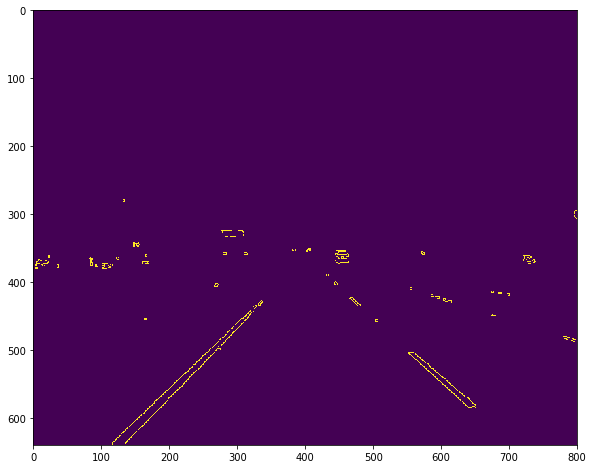

In [171]:
c2_img2 = canny_img(gsblur2, 50,150)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c2_img2.shape))
plt.imshow(c2_img2)

In [172]:
def filter_image(image):
    
    grayscale_img = get_gray(image)
    
    #white_threshold = 150
    #lowerwhite = [150,150,150]
    #lower_white = np.array([white_threshold, white_threshold, white_threshold])
    #upperwhite = [255,255,255]
    #upper_white = np.array([255,255,255])
    #white_mask = cv2.inRange(grayscale_img, lower_white, upper_white)
    
    white_mask = cv2.inRange(grayscale_img, 150, 255)
    #white_image = cv2.bitwise_and(grayscale_img, grayscale_img, mask=white_mask)

    # YELLOW PIXELS
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([20,150,150],dtype='uint8')
    upper_yellow = np.array([255,255,255],dtype='uint8')

    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    #yellow_image = cv2.bitwise_and(image, image, mask = yellow_mask)

    # combine images
    #image2 = cv2.addWeighted(white_image, 1., yellow_image, 1., 0.)
    
    mask_yw = cv2.bitwise_or(white_mask, yellow_mask)
    mask_yw_image = cv2.bitwise_and(grayscale_img, mask_yw)

    return mask_yw_image

Image Dimensions :: (640, 800)


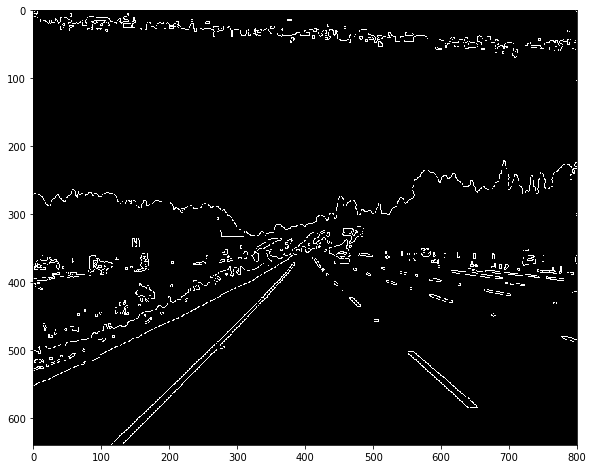

In [173]:
img_copy = img

processed_img = filter_image(img_copy)
#processed_img = get_gray(processed_img)

processed_img = gaussian_blur(processed_img,5)
processed_img = canny_img(processed_img,50,150)

plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(processed_img.shape))
plt.imshow(processed_img,cmap='gray')

In [174]:
def region_of_interest(image, vertices):
    mask = np.zeros_like(image)
    # fill the mask
    cv2.fillPoly(mask, vertices, 255)
    # now show area that is the mask
    masked = cv2.bitwise_and(image, mask)
    return masked

In [177]:
imshape = img.shape
lower_left = [50,600]
lower_right = [750,600]
top_left = [100,400]
top_right = [700,400]
vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
processed_img = region_of_interest(processed_img, vertices)

Image Dimensions :: (640, 800)


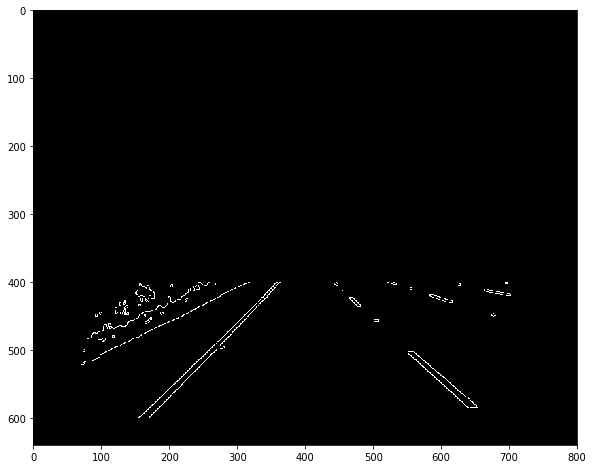

In [178]:
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(processed_img.shape))
plt.imshow(processed_img,cmap='gray')